# Decriminalization of drugs
Portugal and Oregon stand out as two regions that have implemented distinct decriminalization policies. Portugal's journey began in 2001 with the decriminalization of all drugs, a pioneering move aimed at reframing drug use as a public health issue rather than a criminal one. This policy was driven by a severe public health crisis characterized by high rates of drug-related deaths and HIV infections among drug users (Ashton, 2019). Under this policy, individuals caught with small quantities of drugs are not prosecuted but referred to "dissuasion commissions," which assess their needs and recommend treatment, fines, or social services. This approach focuses more on rehabilitation and harm reduction rather than punishment (Félix et al., 2017).
<br>
<br>
In contrast with Portugal, Oregon’s policy, implemented in 2021, only decriminalizes the possession of small amounts of certain drugs, including heroin, cocaine, and methamphetamine. Rather than facing arrest and jail time, individuals in Oregon caught with these substances receive a civil citation and a fine, which can be waived if they seek an assessment for substance use disorder. Oregon's approach is more focused on reducing incarceration rates and reallocating funds from law enforcement to addiction treatment and harm reduction services (Gerstner, 2021).
<br>
<br>
To understand the impact of these policies, we analyzed a range of data from both regions, including drug-related deaths, drug-related crime statistics, and public health expenditures. By comparing these metrics before and after decriminalization, we draw insights into the efficacy and challenges of each approach.

## Perspective 1 - Drugs should be decriminalized to stop drug criminalization

### Decriminalization reduces drug-related crime
One of the significant arguments for the legalization of drugs is the reduction of crime (Cussen & Block, 2000). Criminal activity surrounding drugs is one of the factors that makes drugs problematic, not only due to direct drug offenses but also the larger organized crime it facilitates (Caulkins & Kleiman, 2014). Legalizing drugs significantly reduces the financial incentive, thereby decreasing criminal activity (Greer et al., 2022).
<br>
<br>
Unfortunately, there is no available data on drug-related crime in Europe for the years before 2001, making it difficult to compare Portugal before and after decriminalization. However, there is data available on drug offenses per country per year. This data will be used to make comparisons between drug offenses in Portugal, Italy, France, and Spain, as well as between Portugal, the Netherlands, Belgium, and Denmark.


In [68]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

crimes_1 = pd.read_csv("DLOs_europe_1.csv")
crimes_2 = pd.read_csv("DLOs_europe_2.csv")

crimes_df1 = pd.DataFrame(crimes_1)
crimes_df2 = pd.DataFrame(crimes_2)

years = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007']

def compare_values(self_value, other_value):
    if pd.isna(self_value) and pd.isna(other_value):
        return np.nan
    elif pd.isna(self_value):
        return other_value
    elif pd.isna(other_value):
        return self_value
    elif self_value == other_value:
        return self_value
    else:
        return (self_value + other_value) / 2

combined_crimes = {'Country': crimes_df1['Country']}
for year in years:
    if year in crimes_df1.columns and year in crimes_df2.columns:
        combined_crimes[year] = crimes_df1.apply(
            lambda row: compare_values(
                row[year], 
                crimes_df2.loc[crimes_df2['Country'] == row['Country'], year].values[0]
                if row['Country'] in crimes_df2['Country'].values else np.nan 
            ), axis=1
        )
    elif year in crimes_df1.columns:
        combined_crimes[year] = crimes_df1[year]
    elif year in crimes_df2.columns:
        combined_crimes[year] = crimes_df2[year]
    else:
        combined_crimes[year] = np.nan

crimes_combined_df = pd.DataFrame(combined_crimes)


def create_bar_plot(countries):
    fig = go.Figure()

    for country in countries:
        country_data = crimes_combined_df[crimes_combined_df['Country'] == country]

        fig.add_trace(go.Bar(
            x=years,
            y=country_data[years].values[0],
            name=country,
            width=0.2
        ))

    fig.update_layout(
        barmode='group',
        title="Amount of drug crimes per year",
        xaxis_title="Year",
        yaxis_title="Amount of Cases",
        template="plotly_white"
    )
    return fig

fig = create_bar_plot(['Portugal', 'Italy','France', 'Spain'])

buttons = [
    dict(
        args=[
            {'x': [years] * 4,
             'y': [[crimes_combined_df[crimes_combined_df['Country'] == country][year].values[0]
                    for year in years]
                   for country in ['Portugal', 'Italy', 'France', 'Spain']],
             'name': ['Portugal', 'Italy', 'France', 'Spain']}
        ],
        label='Culturally similar countries',
        method='update'
    ),
    dict(
        args=[
            {'x': [years] * 4,
             'y': [[crimes_combined_df[crimes_combined_df['Country'] == country][year].values[0]
                    for year in years]
                   for country in ['Portugal', 'Netherlands', 'Belgium', 'Denmark']],
             'name': ['Portugal', 'Netherlands', 'Belgium', 'Denmark']}
        ],
        label='Active harm reduction policies',
        method='update'
    )
]

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=0.5,
            xanchor='center',
            y=1.1,
            yanchor='top'
        ),
    ]
)

fig.show()

These first three Southern European countries are selected due to their similar cultural and social dynamics with Portugal. This comparison clearly shows that the crime rate is consistently lower in Portugal than in these other countries. Although it is undeniable that other factors also play a role, this is certainly a notable difference.
<br>
<br>
The Netherlands, Belgium, and Denmark are selected because these countries are particularly active with National Drug Plans for harm reduction (van der Gouwe et al., 2022; Cook et al., 2010; Laursen, 1995). These policies aim to reduce the negative health and social consequences of drug use, rather than focusing solely on punitive measures. Even in comparison with these countries, the number of cases in Portugal remains low.
<br>
<br>
The data suggests that both in comparison with culturally similar countries and those with active harm reduction policies, Portugal's drug legalization has been effective in maintaining a lower rate of drug-related offenses. This supports the argument that decriminalization can significantly reduce drug-related crime and its associated social harms. 

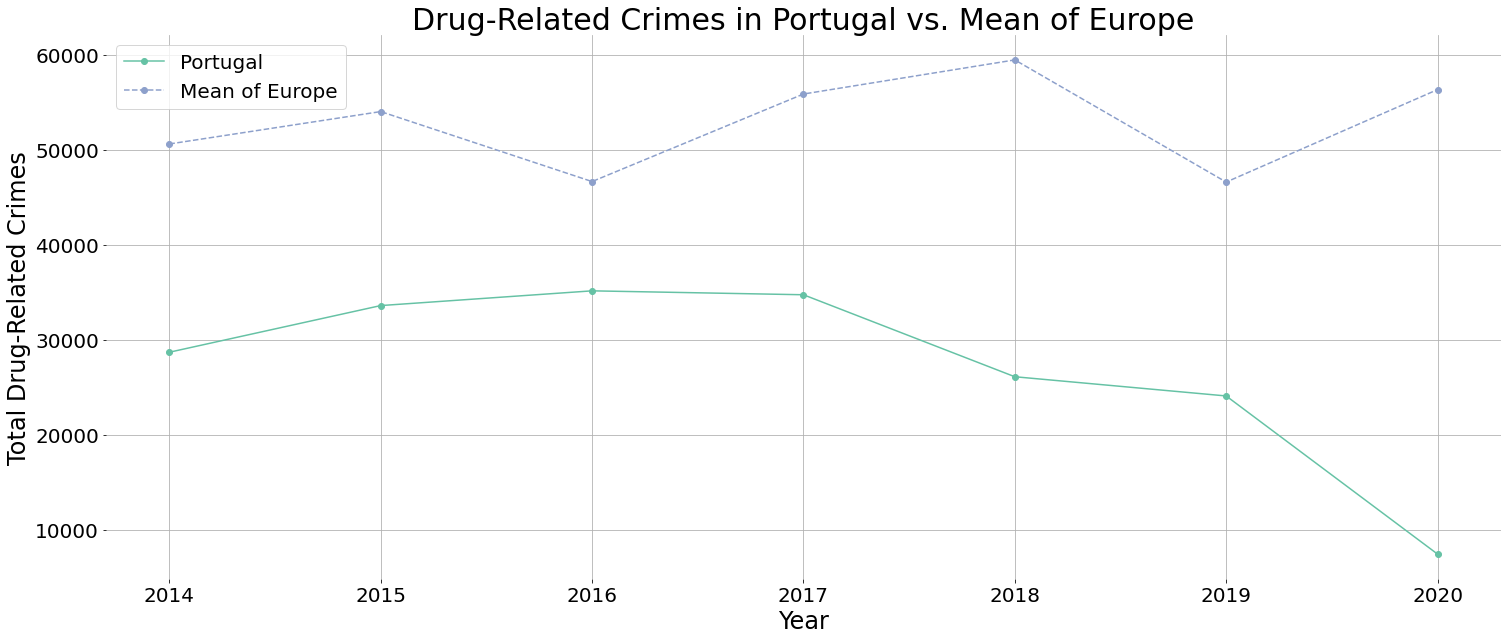

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("9_Misdaden.csv")

# Filter for Europe
europe_df = df[df['Region'] == 'Europe']

# Group by Country/Territory and Year, and sum the Total crimes
grouped_df = europe_df.groupby(['Country/Territory', 'Year']).agg({'Total': 'sum'}).reset_index()

# Filter for Portugal
portugal_df = grouped_df[grouped_df['Country/Territory'] == 'Portugal']

# Calculate the mean for Europe (excluding Portugal)
europe_mean_df = grouped_df[grouped_df['Country/Territory'] != 'Portugal'].groupby('Year').agg({'Total': 'mean'}).reset_index()
europe_mean_df.rename(columns={'Total': 'Mean of Europe'}, inplace=True)

# Merge Portugal data with Europe mean data
merged_df = pd.merge(portugal_df, europe_mean_df, on='Year', how='left')

# Plotting
fig, ax = plt.subplots(figsize=(25, 10))


# Remove axes spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)  # Hide all spines (borders)


ax.plot(merged_df['Year'].values, merged_df['Total'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
ax.plot(merged_df['Year'].values, merged_df['Mean of Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue

ax.set_xlabel('Year', fontsize=24)
ax.set_ylabel('Total Drug-Related Crimes', fontsize=24)
ax.set_title('Drug-Related Crimes in Portugal vs. Mean of Europe', fontsize=30)

# Customize tick parameters
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# Set the legend
ax.legend(fontsize=20)

# Enable the grid
ax.grid(True)

# Show the plot
plt.show()

*Figure 2: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 until 2020*
<br>
*Data: United Nations Office on Drugs and Crime, World Drug Report 2022*

Additionally, the line plot shows that the mean number of drug-related crimes in Europe is higher than in Portugal, further emphasizing the effectiveness of Portugal's drug policies.

### Decriminalization alleviates the burden on the criminal justice system and redirects resources to public health.
Another argument for the decriminalization of drugs is that decriminalization alleviates the burden on the criminal justice system and redirects resources to public health. To understand how decriminalization impacts the criminal justice system, we used data from the Council of Europe SPACE project (Annual Reports 2001-2023) to visualize the percentage of prisoners convicted of drug-related crimes per year. This variable is crucial as the existing drug legislation could have a direct impact on this variable and the criminal justice system. 

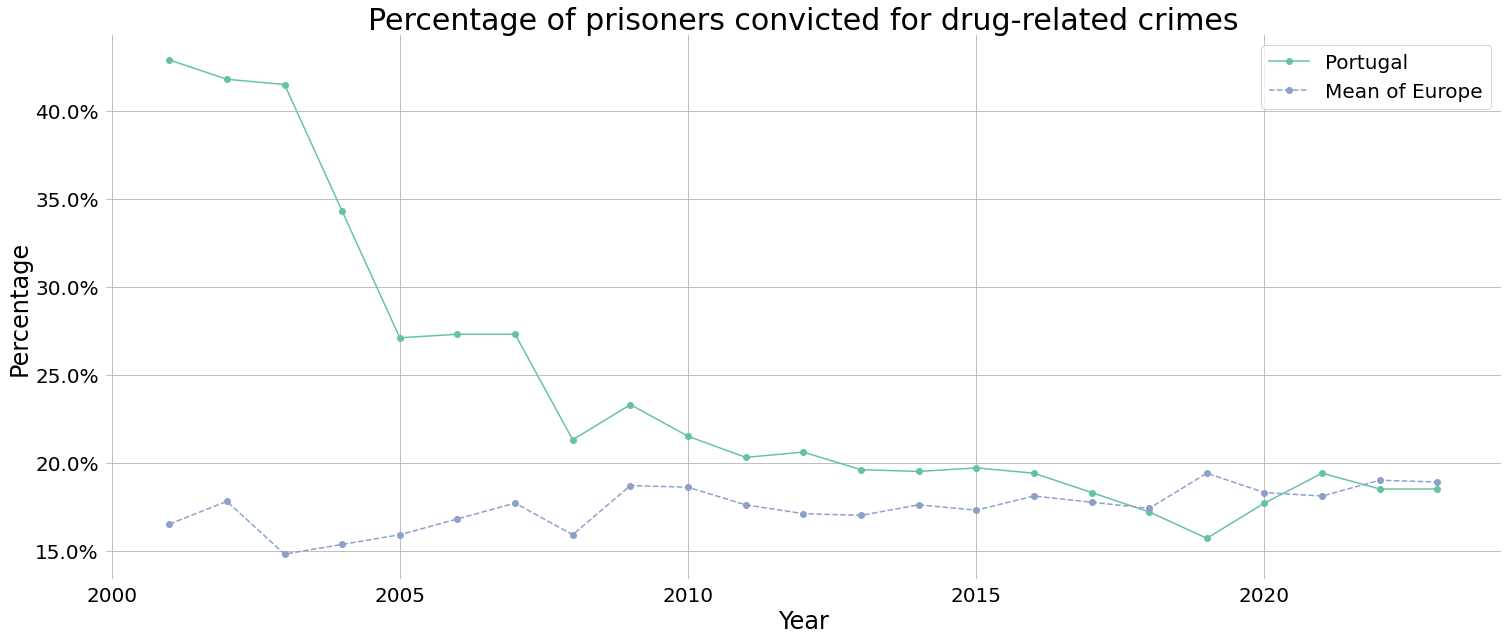

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Read the CSV file
drug_offences_df = pd.read_csv('drug_offences.csv')

# Interpolate missing values
drug_offences_df = drug_offences_df.interpolate()

# Plotting
plt.figure(figsize=(25, 10))
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Percentage of prisoners sentenced for drug offences in Portugal'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Mean Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue


# Customize title and axis labels
plt.title('Percentage of prisoners convicted for drug-related crimes', fontsize=30)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Percentage', fontsize=24)

# Customize tick parameters
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(fontsize=20)

# Remove axis lines (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hide ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Show the plot
plt.grid(True)
plt.show()

*Figure 3: Percentage of prisoners convicted for drug-related crimes in Portugal vs. Mean of Europe, from 2001 until 2023*
<br>
*Data: Council of Europe SPACE project, Annual Reports 2001-2023*


In 2001, the year the new drug decriminalization legislation came into effect, more than 40% of the Portuguese prisoners were incarcerated for drug-related crimes, which is considerably above the European mean. The data visualization shows that whilst the European mean has gradually risen from 17 to 19% over the years, there is a substantial decline in the percentage of prisoners convicted of drug-related crimes in Portugal after decriminalization in 2001. In the 1990s, drug-related offenses accounted for a significant portion of the prison population. After 2001, these figures dropped sharply, supporting that decriminalization effectively reduces the burden on the criminal justice system, allowing resources to be reallocated towards other priorities, such as public health initiatives and support services for individuals with substance use disorders.

## Second Perspective - Drugs should not be decriminalized because of the potential for increased addiction and health issues
### Increased deathrates (Oregon)
Decriminalizing drugs, while intended to reduce harm and shift focus to treatment rather than punishment, can paradoxically lead to higher addiction rates, poorer health outcomes, and increased mortality (Ferraiolo, 2014; Miech et al., 2015). These are some of the most prominent arguments used by advocates against decriminalization.
When we analyzed the data on drug-related death rates in the United States before and after Oregon’s decriminalization law (2021), we found that Oregon now has one of the highest death rates, surpassed only by Washington.


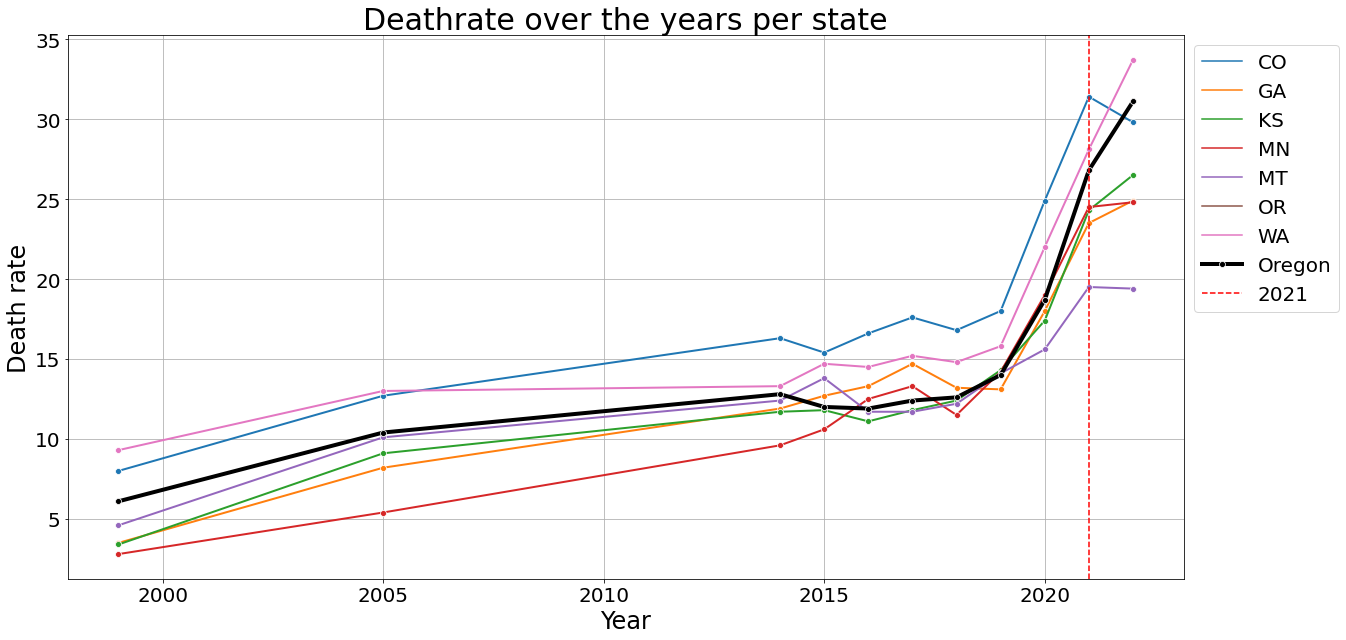

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
statesdata = pd.read_csv("statesdata.csv")
statesdata = statesdata[["YEAR", "STATE", "RATE"]]

# Filter the data for the desired states
desired_states = ['OR', 'CO', 'GA', 'KS', 'MN', 'MT', 'WA']
statesdata = statesdata[statesdata['STATE'].isin(desired_states)]

# Set the figure size to make the plot larger
plt.figure(figsize=(20, 10))

# Plot all states
sns.lineplot(data=statesdata, x='YEAR', y='RATE', hue='STATE', palette='tab10', marker='o', linewidth=2)

# Highlight Oregon with a distinct color and larger line width
sns.lineplot(data=statesdata[statesdata['STATE'] == 'OR'], x='YEAR', y='RATE', color='black', marker='o', linewidth=4, label='Oregon')

# Add a vertical line for the year 2021
plt.axvline(x=2021, color='red', linestyle='--', label='2021')

# Customize the title and axis labels
plt.title('Deathrate over the years per state', fontsize=30)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Death rate', fontsize=24)

# Customize the tick parameters
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Customize the legend
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


*Figure 4: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington*
<br>
*Data: CDC, Drug Overdose Mortality by State*

The visualization illustrates a trend in drug-related death rates across several states, with a special focus on Oregon. Oregon's death rates have continued to rise, displaying a steeper increase compared to other states. This trend stands in contrast to several other states, where death rates are stabilizing or even declining.

This visualization only compares a view states with Oregon. For a more complete story, the map below shows the death rates in every state. 

In [19]:
import pandas as pd
from pandas import *
import plotly.graph_objs as go

df = pd.read_csv("statesdata.csv")
df.columns = df.columns.str.strip()

# Check for 'YEAR' column
if 'YEAR' not in df.columns:
    raise KeyError("The 'YEAR' column is missing or misspelled in the DataFrame.")

# Calculate min and max values for RATE to set fixed color scale
min_rate = df['RATE'].min()
max_rate = df['RATE'].max()

# Sort years to ensure the slider goes from earliest to latest year
years = sorted(df['YEAR'].unique())

# Initialize the figure
fig = go.Figure()

# Create a choropleth map for each year and add it to the figure
for year in years:
    filtered_df = df[df['YEAR'] == year]
    fig.add_trace(
        go.Choropleth(
            locations=filtered_df['STATE'],
            z=filtered_df['RATE'],
            locationmode='USA-states',
            colorscale='Turbo',
            zmin=min_rate,
            zmax=max_rate,
            hovertext=filtered_df['STATE'],
            hoverinfo='location+z+text',
            visible=False,
            name=str(year)
        )
    )

# Make the first trace visible
fig.data[0].visible = True

# Create sliders
steps = []
for i, year in enumerate(years):
    step = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(fig.data))]},
              {'title': f'US Data for {year} - Death Rate'}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    x=0.02,  # Move the slider more to the left
    xanchor='left',
    y=0,
    yanchor='top',
    pad=dict(t=50)
)]

# Add the sliders to the figure
fig.update_layout(
    title_text=f'US Data for {years[0]} - Death Rate',
    geo=dict(
        scope='usa',
        lakecolor='rgb(255, 255, 255)',
        projection=dict(type='albers usa'),
        showlakes=True,
        subunitcolor="rgb(255, 255, 255)",
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    sliders=sliders,
    height=800,  # Adjust the height as needed
)

# Show the interactive map
fig.show()

*Figure 5: Deathrate of drug overdose mortality in all States in different years (interactive)*
<br>
*Data: CDC, Drug Overdose Mortality by State*

### Decreased deathrates (Portugal)

Decriminalization, as implemented in Portugal since 2001, removes criminal penalties for personal drug possession and introduces a regulated framework. This ensures drugs are free from harmful contaminants and have consistent potency. Proponents of drug decriminalization argue that this leads to better public health by reducing harm from adulterated drugs. When drugs are illegal, they are produced and distributed through unregulated channels, leading to exposure to toxic adulterants and inconsistent potency, which increases drug-related deaths. When we analyzed our dataset, we found that there is a noticeable decline in drug-related deaths across all age groups after Portugal's decriminalization of drugs in 2001:


In [40]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("15_deaths-due-to-illicit-drug-use-by-age.csv")

# Filter data for a specific country (e.g., Portugal)
selected_country = 'Portugal'
country_df = df[df['Entity'] == selected_country].copy()

# Calculate cumulative deaths for stacking
country_df['Cumulative 15-49 years'] = country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 15-49 years']
country_df['Cumulative 50-69 years'] = country_df['Cumulative 15-49 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 50-69 years']
country_df['Cumulative 70+ years'] = country_df['Cumulative 50-69 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 70+ years']

# Initialize the figure
fig = go.Figure()

# Add traces for each age group, using cumulative values for stacking
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'], fill='tozeroy', name='5-14 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 15-49 years'], fill='tonexty', name='15-49 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 50-69 years'], fill='tonexty', name='50-69 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 70+ years'], fill='tonexty', name='70+ years'))

# Update plot layout
fig.update_layout(title=f'Drug-Related Deaths in {selected_country} by Age Group', xaxis_title='Year', yaxis_title='Cumulative Deaths', legend_title='Age Group')

# Show the interactive plot within the Jupyter Notebook
fig.show()

*Figure 6: Estimated annual number of drug use-related deaths, categorized by age*
<br>
*Data: IHME, Global Burden of Disease (2019)*

By shifting the focus to public health and harm reduction, Portugal managed to lower drug-related fatalities, indicating that decriminalization can lead to safer drug use and better health outcomes.

## References

Ashton, H. (2019). Drug Decriminalization in Portugal A Public Health Response, a Humanistic Approach. *Health For The Millions*, 45(1), 41–43. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3010673
<br>
<br>
Caulkins, J. P., & Kleiman, M. (2014). *How much crime is drug-related?: History, limitations, and potential improvements of estimation methods*. Washington, DC: National Criminal Justice Reference Service.
<br>
<br>
Cook, C., Bridge, J., & Stimson, G. V. (2010). The diffusion of harm reduction in Europe and beyond. *Monographs*, 37.
<br>
<br>
Cussen, M., & Block, W. (2000). Legalize drugs now!: An analysis of the benefits of legalized drugs. *American Journal of Economics and Sociology*, 59(3), 525-536.
<br>
<br>
Félix, S., & Portugal, P. (2017). Drug decriminalization and the price of illicit drugs. *The International Journal Of Drug Policy/International Journal On Drug Policy*, 39, 121–129. https://doi.org/10.1016/j.drugpo.2016.10.014
<br>
<br>
Félix, S., Portugal, P., & Tavares, A. S. (2017). Going after the Addiction, Not the Addicted: The Impact of Drug Decriminalization in Portugal. *Social Science Research Network*. https://doi.org/10.2139/ssrn.3010673
<br>
<br>
Ferraiolo, K. (2014). Morality framing in U.S. drug control policy: An example from marijuana decriminalization. *World Medical & Health Policy*, 6(4), 347–374. https://doi.org/10.1002/wmh3.114
<br>
<br>
Greer, A., Bonn, M., Shane, C., Stevens, A., Tousenard, N., & Ritter, A. (2022). The details of decriminalization: Designing a non-criminal response to the possession of drugs for personal use. *International Journal of Drug Policy*, 102, 103605.
<br>
<br>
Gerstner, B. (2021). Oregon Narcotics Decriminalization: Example or Outcast?. *Ohio State Legal Studies Research Paper*, (668).
<br>
<br>
Greenwald, G. (2009). Drug Decriminalization in Portugal: Lessons for Creating Fair and Successful Drug Policies. *Social Science Research Network*. https://doi.org/10.2139/ssrn.1543991
<br>
<br>
van der Gouwe, D., Strada, L., Diender, B., van Gelder, N., & de Gee, A. (2022). *Harm reduction services in the Netherlands: recent developments and future challenges*. T. Inst.
<br>
<br>
Jesseman, R., & Payer, D. (2018). Decriminalization: options and evidence. *Canadian Centre on Substance Use and Addiction*, 2018, 1-18.
<br>
<br>
Laursen, L. (1995). Harm Reduction Strategy and the Drug Problem: Definitions and Applications in Denmark. *Nordisk Alkoholtisdkrift (Nordic Alcohol Studies)*, 12(1_suppl), 97-106.
<br>
<br>
Miech, R. A., Johnston, L., O’Malley, P. M., Bachman, J. G., Schulenberg, J., & Patrick, M. E. (2015). Trends in use of marijuana and attitudes toward marijuana among youth before and after decriminalization: The case of California 2007–2013. *The International Journal Of Drug Policy/International Journal On Drug Policy*, 26(4), 336–344. https://doi.org/10.1016/j.drugpo.2015.01.009






